In [1]:
import numpy as np  
import pandas as pd  
from sklearn import utils  
import matplotlib.pyplot as plt

In [2]:
read_data =pd.read_csv("kdd_train.csv",low_memory=False)
read_data["labels"]

0          normal
1          normal
2         neptune
3          normal
4          normal
           ...   
125968    neptune
125969     normal
125970     normal
125971    neptune
125972     normal
Name: labels, Length: 125973, dtype: object

In [3]:
read_data = read_data[read_data['service'] == "http"]
read_data = read_data[read_data["logged_in"] == 1]

In [4]:
applicable_features = [  
    "duration",
    "src_bytes",
    "dst_bytes",
    "labels"]

In [5]:
read_data = read_data[applicable_features]
read_data

,duration,src_bytes,dst_bytes,labels
3,0,232,8153,normal
4,0,199,420,normal
12,0,287,2251,normal
16,0,300,13788,normal
18,0,233,616,normal
...,...,...,...,...
125959,0,373,4777,normal
125960,0,329,885,normal
125961,0,236,2698,normal
125963,0,334,1600,normal


In [6]:
read_data["duration"] = np.log((read_data["duration"] + 0.1).astype(float))  
read_data["src_bytes"] = np.log((read_data["src_bytes"] + 0.1).astype(float))  
read_data["dst_bytes"] = np.log((read_data["dst_bytes"] + 0.1).astype(float)) 

In [7]:
read_data.head

<bound method NDFrame.head of         duration  src_bytes  dst_bytes  labels
3      -2.302585   5.447168   9.006154  normal
4      -2.302585   5.293807   6.040493  normal
12     -2.302585   5.659831   7.719174  normal
16     -2.302585   5.704116   9.531561  normal
18     -2.302585   5.451468   6.423409  normal
...          ...        ...        ...     ...
125959 -2.302585   5.921846   8.471589  normal
125960 -2.302585   5.796362   6.785701  normal
125961 -2.302585   5.464255   7.900303  normal
125963 -2.302585   5.811440   7.377821  normal
125967 -2.302585   5.883601   5.927193  normal

[36069 rows x 4 columns]>

In [8]:
read_data.loc[read_data['labels'] == "normal", "traffic_behaviour"] = 1  
read_data.loc[read_data['labels'] != "normal", "traffic_behaviour"] = -1
read_data

,duration,src_bytes,dst_bytes,labels,traffic_behaviour
3,-2.302585,5.447168,9.006154,normal,1.0
4,-2.302585,5.293807,6.040493,normal,1.0
12,-2.302585,5.659831,7.719174,normal,1.0
16,-2.302585,5.704116,9.531561,normal,1.0
18,-2.302585,5.451468,6.423409,normal,1.0
...,...,...,...,...,...
125959,-2.302585,5.921846,8.471589,normal,1.0
125960,-2.302585,5.796362,6.785701,normal,1.0
125961,-2.302585,5.464255,7.900303,normal,1.0
125963,-2.302585,5.811440,7.377821,normal,1.0


In [9]:
target = read_data['traffic_behaviour']


In [10]:
outliers = target[target == -1]  
print("outliers.shape", outliers.shape)  
print("outlier fraction", outliers.shape[0]/target.shape[0])

outliers.shape (964,)
outlier fraction 0.026726551886661676


In [11]:
read_data.drop(["labels","traffic_behaviour"], axis=1, inplace=True)

read_data.shape  


(36069, 3)

In [12]:
from sklearn.model_selection import train_test_split  
train_data, test_data, train_target, test_target = train_test_split(read_data, target, train_size = 0.8)  
train_data.shape  

(28855, 3)

In [13]:
train_data.tail


<bound method NDFrame.tail of         duration  src_bytes  dst_bytes
117820 -2.302585   5.215479   7.118907
71978  -2.302585   5.799396   7.116475
6301   -2.302585   5.613493   8.484897
63784   3.437208   5.557214   8.561803
77339  -2.302585   5.704116   7.210892
...          ...        ...        ...
25538  -2.302585   5.759217   5.635147
77395  -2.302585   5.333202   7.435497
40641  -2.302585   5.384954   9.624309
71567  -2.302585   5.777962   5.723912
116207 -2.302585   5.375741   6.598645

[28855 rows x 3 columns]>

In [14]:
from sklearn import svm
nu = outliers.shape[0] / target.shape[0]  
print("The calculated values of nu is:", nu)

model = svm.OneClassSVM(nu=nu, kernel='rbf', gamma=0.00005)  
model.fit(train_data)  


The calculated values of nu is: 0.026726551886661676


OneClassSVM(gamma=5e-05, nu=0.026726551886661676)

In [15]:
from sklearn import metrics  
values_preds = model.predict(train_data)  
values_targs = train_target

In [16]:
print("Training DataSET accuracy: ", 100 *  metrics.accuracy_score(values_targs, values_preds))
print("Training DataSET Precision: ",100 * metrics.precision_score(values_targs, values_preds))
print("Training DataSET Recall: ", 100 * metrics.recall_score(values_targs, values_preds))
print("Training DataSET f1: ", 100 * metrics.f1_score(values_targs, values_preds))

Training DataSET accuracy:  98.30531970195807
Training DataSET Precision:  99.76183602771363
Training DataSET Recall:  98.49299939434964
Training DataSET f1:  99.12335741560746


In [17]:
values_preds = model.predict(test_data)  
values_targs = test_target

In [18]:
print("Test DataSet Accuracy: ", 100 * metrics.accuracy_score(values_targs, values_preds))
print("Test DataSet Precision: ", 100 * metrics.precision_score(values_targs, values_preds))
print("Test DataSet Recall: ", 100 * metrics.recall_score(values_targs, values_preds))
print("Test DataSet F1: ", 100 * metrics.f1_score(values_targs, values_preds))

Test DataSet Accuracy:  98.28112004435819
Test DataSet Precision:  99.85574148874784
Test DataSet Recall:  98.37976122797045
Test DataSet F1:  99.1122565864834


In [19]:
confusion_matrix = metrics.confusion_matrix(values_targs, values_preds)


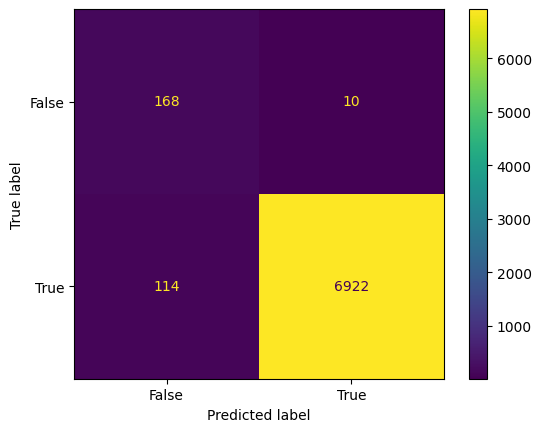

In [20]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()